# Data Science Society Hierarchical clustering (solutions)

## Debugging problems

### 1) Using the data that we have provided, implement the clusters using a distance of 6

Using the crime dataset that we exported from the previous notebook, implement the clustering algorithm but using distances of 6 and see how this has changed the result both in terms of different clusters and also spatially. Think about why do you get the outcome that you do based on the dendrogram shown:

In [1]:
#import all necessary libraries
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
from sklearn.cluster import AgglomerativeClustering

In [2]:
#read in the crime data that we extracted before
London_crime = gpd.read_file("Data/crime_2019.gpkg")

In [3]:
#extract the columns that we don't want to plot
not_plot = ["LSOA11CD", "geometry", "LSOA Code", "Total_crime", "Aggl_clus"]
#use this to extract the columns that we do want to plot
to_plot = [col for col in London_crime.columns if col not in not_plot]
#extract the values that we want to plot
crime_clus = London_crime[to_plot]

In [4]:
#create the model that we want, setting the linkage to ward, the distance threshold to 6 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model6 = AgglomerativeClustering(linkage="ward", 
                                 distance_threshold = 6, 
                                 n_clusters=None)
#fit the model to the data
model6.fit(crime_clus)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

In [5]:
#assign the labels back to the dataset
London_crime["Aggl_clus_6"] = model6.labels_

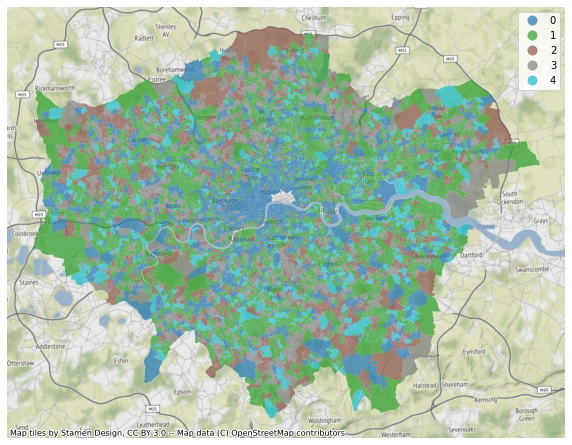

In [6]:
#set the base axis
fig, ax = plt.subplots(figsize = (10,10))

#plot the results
London_crime.plot(column = "Aggl_clus_6", 
                  categorical = True, 
                  legend=True, 
                  ax=ax,
                  alpha = 0.7,
                 cmap = "tab10")

#add a basemap
cx.add_basemap(ax = ax,
               crs = "EPSG:27700")

#set the axis off
ax.set_axis_off()

In [7]:
#extract the table showing the summary results
agglom_means =London_crime.groupby("Aggl_clus_6")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

#turn this into a dataframe
agglom_means_T = pd.DataFrame(agglom_means_T)
#show the results
agglom_means_T

Aggl_clus_6,0,1,2,3,4
Arson and Criminal Damage,0.049,0.089,0.064,0.063,0.079
Burglary,0.086,0.101,0.319,0.124,0.068
Drug Offences,0.048,0.059,0.031,0.028,0.040
Miscellaneous Crimes Against Society,0.010,0.016,0.009,0.010,0.013
Possession of Weapons,0.007,0.008,0.006,0.004,0.007
Public Order Offences,0.057,0.063,0.044,0.037,0.051
Robbery,0.051,0.050,0.029,0.029,0.025
Theft,0.377,0.132,0.072,0.078,0.073
Vehicle Offences,0.119,0.176,0.199,0.452,0.123
Violence Against the Person,0.195,0.306,0.229,0.174,0.520


C:\Users\phili\AppData\Local\Temp/ipykernel_21244/1802813288.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


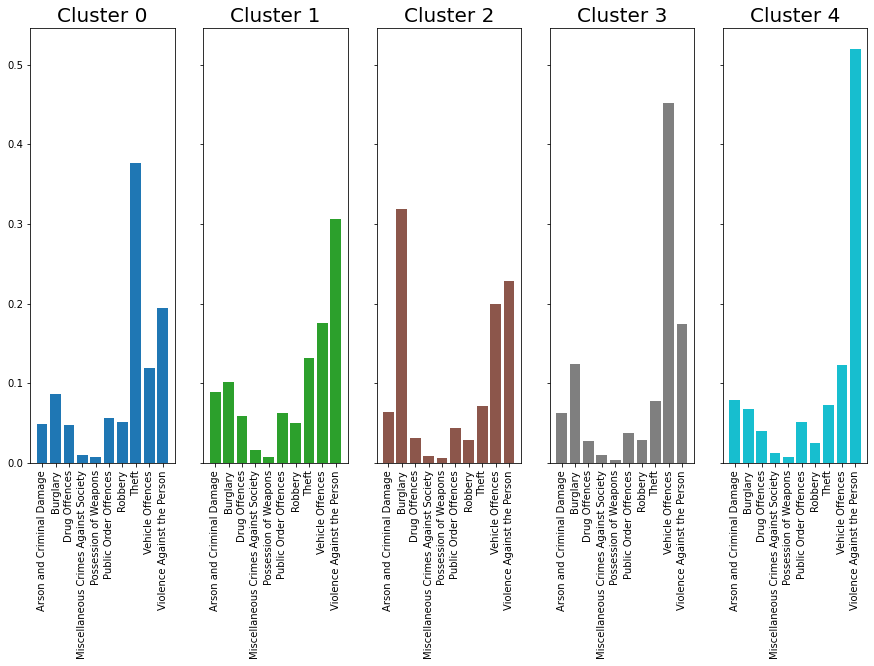

In [8]:
#reset the index
agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#2ca02c", "#8c564b", "#7f7f7f", "#17becf"]

#create subplots for each cluster
fig, ax = plt.subplots(1,5, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

- How is this different from the previous results?
- Does the extra cluster add anything to our analysis?
- What about if you increased distance?

### 2) Using the same dataset, try to implement the results with average linkage

We have already implemented the model with wards linkage. Why not try changing the linkage metric (more information [here](https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-1-theory-linkage-and-affinity-e3b6a4817702)) to see how this changes the results:

In [9]:
#implement the model
model_avg = AgglomerativeClustering(linkage="average", 
                                    distance_threshold = 0.63, 
                                    n_clusters=None)
#fit the model to the data
model_avg.fit(crime_clus)

AgglomerativeClustering(distance_threshold=0.63, linkage='average',
                        n_clusters=None)

In [10]:
#assign the labels back to the dataset
London_crime["Aggl_clus_avg"] = model_avg.labels_

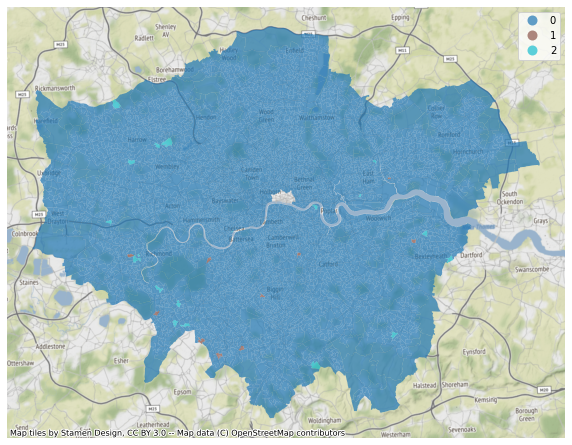

In [11]:
#create the base axis
fig, ax = plt.subplots(figsize = (10,10))

#plot the data to the axis
London_crime.plot(column = "Aggl_clus_avg", 
                  categorical = True, 
                  legend=True, 
                  ax=ax,
                  alpha = 0.7,
                 cmap = "tab10")

#add the basemap
cx.add_basemap(ax = ax,
               crs = "EPSG:27700")

#set the axis off
ax.set_axis_off()

In [12]:
#create the results table
agglom_means =London_crime.groupby("Aggl_clus_avg")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T

Aggl_clus_avg,0,1,2
Arson and Criminal Damage,0.073,0.106,0.000
Burglary,0.127,0.000,0.068
Drug Offences,0.047,0.085,0.023
Miscellaneous Crimes Against Society,0.013,0.000,0.005
Possession of Weapons,0.007,0.033,0.006
Public Order Offences,0.054,0.095,0.016
Robbery,0.042,0.000,0.003
Theft,0.166,0.020,0.042
Vehicle Offences,0.197,0.625,0.023
Violence Against the Person,0.276,0.037,0.815


C:\Users\phili\AppData\Local\Temp/ipykernel_21244/672185684.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


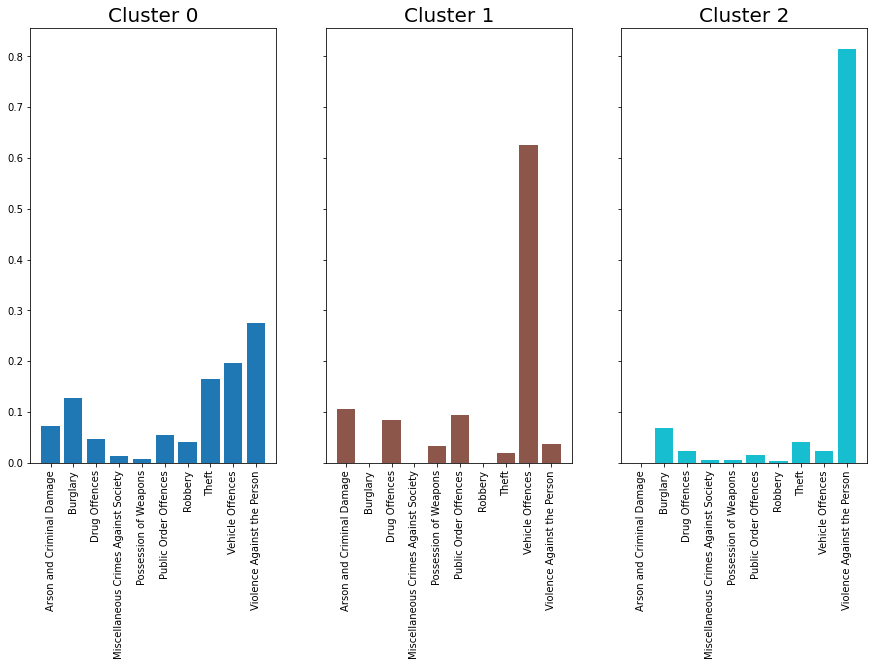

In [13]:
#plot the results
agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#8c564b", "#17becf"]

#create subplots for each cluster
fig, ax = plt.subplots(1,3, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

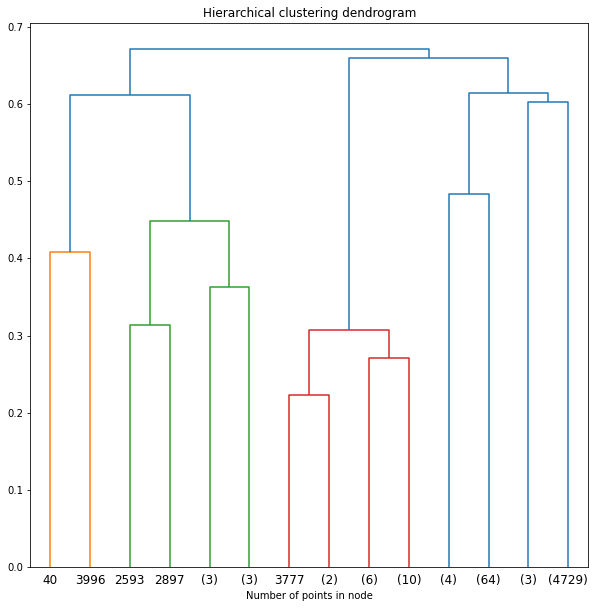

In [14]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model_avg, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

- What has gone wrong here? 
- Why do you think this has gone wrong?
- How would you change this?
- What about other linkage metrics?

### 3) Try implementing a spatially constrained model using wards linkage

Following this [link](https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-3-spatial-clustering-1f8cbd451173) Try implementing a spatially constrained model. The purpose of this is to control for geography in the model (you can also use different linkages in other scenarios to constrain the model as well in the future).

In [15]:
#!pip install libpysal

In [16]:
#import the necessary packages
from libpysal import weights

#calculate the weights matrix
wr = weights.contiguity.Rook.from_dataframe(London_crime)

In [17]:
#create the model with wards linkage
model = AgglomerativeClustering(linkage="ward", 
                                #define the connectivity
                                connectivity = wr.sparse,
                                #set the distance threshold
                                distance_threshold = 3.2, 
                                n_clusters=None)

#fit the model
model.fit(crime_clus)

AgglomerativeClustering(connectivity=<4829x4829 sparse matrix of type '<class 'numpy.float64'>'
	with 28126 stored elements in Compressed Sparse Row format>,
                        distance_threshold=3.2, n_clusters=None)

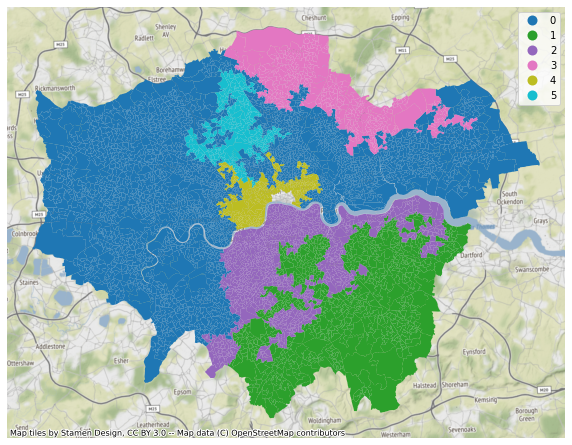

In [18]:
#extract labels
London_crime["Aggl_clus_spa"] = model.labels_

#creating axis
fig, ax =plt.subplots(figsize = (10,10))

#plt the results
London_crime.plot(column = "Aggl_clus_spa", 
                  categorical = True, 
                  legend=True, 
                  ax = ax,
                 cmap = "tab10")

#add the basemap
cx.add_basemap(ax = ax,
               crs = "EPSG:27700")

#remove the axis
ax.set_axis_off()

C:\Users\phili\AppData\Local\Temp/ipykernel_21244/4136056631.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


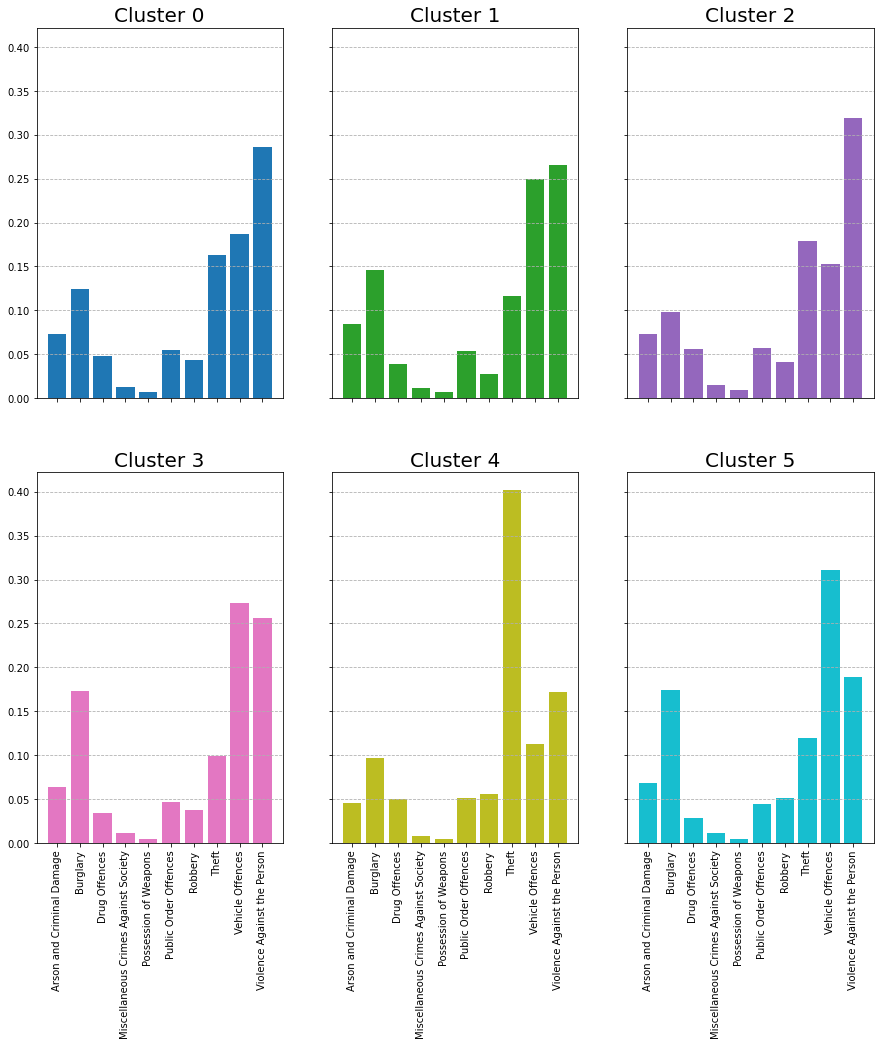

In [19]:
#extract the results
agglom_means =London_crime.groupby("Aggl_clus_spa")[to_plot].mean()
#extract the transformed data
agglom_means_T = pd.DataFrame(agglom_means.T.round(3))
#reset the index
agglom_means_T.reset_index(inplace=True)

#extract the colours
colors = ["tab:blue", "tab:green", "tab:purple", "tab:pink", "tab:olive", "tab:cyan"]

#plot the results
fig, ax = plt.subplots(2,3, figsize = (15,15), sharey = True, sharex = True)
axis = ax.flatten()
for i, col  in enumerate(agglom_means_T.columns):
    if col != "index":
        ax = axis[i-1]
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"],
               color = colors[i-1], )
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        ax.set_title(f"Cluster {col}", fontsize = 20)
        ax.grid(axis = "y", zorder = 0, linestyle = "--")

- How can these be interpreted?
- What is the main difference?
- Can you look at the dendrogram to see how it may be different?
- What about other linkages, distance metrics or spatial weights?

# Find your own dataset to perform this methodology on

Think about:

1. What makes this a good dataset for hierarchical clustering?
2. What distance metric or affinity metric do you want to use?
3. How do your clusters vary with difference distances?
4. How can your results be interpreted?